In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | novikovo
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | bethanien
Processing Record 12 of Set 1 | yanchukan
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | thunder bay
Processing Record 16 of Set 1 | kotlyarevskaya
Processing Record 17 of Set 1 | itarema
Processing Record 18 of Set 1 | makat
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | husavik
Processin

Processing Record 39 of Set 4 | nueve de julio
Processing Record 40 of Set 4 | sumenep
Processing Record 41 of Set 4 | nampula
Processing Record 42 of Set 4 | sol-iletsk
Processing Record 43 of Set 4 | blackwater
Processing Record 44 of Set 4 | saint-georges
Processing Record 45 of Set 4 | huitzuco
City not found. Skipping...
Processing Record 46 of Set 4 | yatou
Processing Record 47 of Set 4 | sorong
Processing Record 48 of Set 4 | kajaani
Processing Record 49 of Set 4 | labuhan
Processing Record 50 of Set 4 | beira
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | mayor pablo lagerenza
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | panzhihua
Processing Record 6 of Set 5 | bambous virieux
Processing Record 7 of Set 5 | oktyabrskoye
Processing Record 8 of Set 5 | santa fe
Processing Record 9 of Set 5 | cam ranh
Processing Record 10 of Set 5 | chifeng
Processing Record 11 of Set 5 | kavaratti
Processing

Processing Record 26 of Set 8 | bambanglipuro
Processing Record 27 of Set 8 | qingdao
Processing Record 28 of Set 8 | los llanos de aridane
Processing Record 29 of Set 8 | porto nacional
Processing Record 30 of Set 8 | teknaf
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | kosa
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | waipawa
Processing Record 35 of Set 8 | tabuk
Processing Record 36 of Set 8 | yima
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | kudahuvadhoo
Processing Record 40 of Set 8 | presidencia roque saenz pena
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | sorvag
City not found. Skipping...
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | sur
Processing Record 46 of Set 8 | bronnoysund
Processing Record 47 of Set 8 | omsk
Processing Record 48 of Set 8 | henties bay
P

Processing Record 16 of Set 12 | narasapur
Processing Record 17 of Set 12 | zhongshu
Processing Record 18 of Set 12 | batemans bay
Processing Record 19 of Set 12 | livingston
Processing Record 20 of Set 12 | samorin
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | birjand
Processing Record 27 of Set 12 | saint-francois
Processing Record 28 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 29 of Set 12 | meyungs
City not found. Skipping...
Processing Record 30 of Set 12 | puerto madryn
Processing Record 31 of Set 12 | cah ab
City not found. Skipping...
Processing Record 32 of Set 12 | hadejia
Processing Record 33 of Set 12 | belmonte
Processing Record 34 of Set 12 | eskil
Processing Record 35 of Set 12 | junction city
Processing Record 36 of Set 12 | caravelas
Processin

In [8]:
len(city_data)

564

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.87,72,100,11.56,KI,2021-07-19 19:44:57
1,Bluff,-46.6000,168.3333,36.81,86,39,11.07,NZ,2021-07-19 19:44:57
2,Arraial Do Cabo,-22.9661,-42.0278,69.76,60,0,13.80,BR,2021-07-19 19:44:57
3,Clyde River,70.4692,-68.5914,43.03,70,90,9.22,CA,2021-07-19 19:44:58
4,Chokurdakh,70.6333,147.9167,56.93,50,100,7.27,RU,2021-07-19 19:44:58
5,Cape Town,-33.9258,18.4232,53.35,85,75,1.01,ZA,2021-07-19 19:41:24
6,Nanortalik,60.1432,-45.2371,43.92,98,100,8.68,GL,2021-07-19 19:44:58
7,Rikitea,-23.1203,-134.9692,69.96,72,100,23.53,PF,2021-07-19 19:44:19
8,Novikovo,51.1537,37.8879,73.78,71,8,4.14,RU,2021-07-19 19:44:58
9,Bethanien,-26.5020,17.1583,59.09,21,0,8.93,NA,2021-07-19 19:44:59


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-19 19:44:57,3.0707,172.7902,82.87,72,100,11.56
1,Bluff,NZ,2021-07-19 19:44:57,-46.6000,168.3333,36.81,86,39,11.07
2,Arraial Do Cabo,BR,2021-07-19 19:44:57,-22.9661,-42.0278,69.76,60,0,13.80
3,Clyde River,CA,2021-07-19 19:44:58,70.4692,-68.5914,43.03,70,90,9.22
4,Chokurdakh,RU,2021-07-19 19:44:58,70.6333,147.9167,56.93,50,100,7.27
5,Cape Town,ZA,2021-07-19 19:41:24,-33.9258,18.4232,53.35,85,75,1.01
6,Nanortalik,GL,2021-07-19 19:44:58,60.1432,-45.2371,43.92,98,100,8.68
7,Rikitea,PF,2021-07-19 19:44:19,-23.1203,-134.9692,69.96,72,100,23.53
8,Novikovo,RU,2021-07-19 19:44:58,51.1537,37.8879,73.78,71,8,4.14
9,Bethanien,NA,2021-07-19 19:44:59,-26.5020,17.1583,59.09,21,0,8.93


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

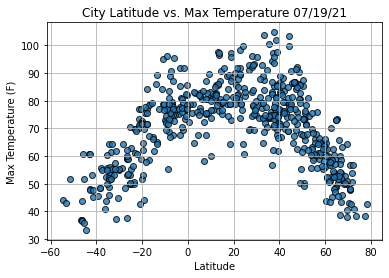

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

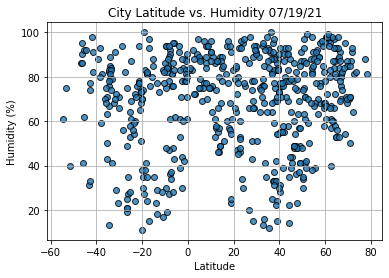

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

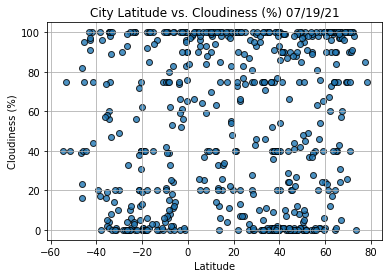

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

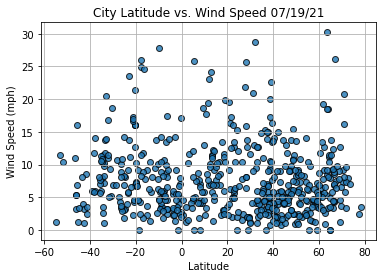

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13= city_data_df.loc[13]
index13

City               Kotlyarevskaya
Country                        RU
Date          2021-07-19 19:44:59
Lat                       43.5734
Lng                       44.0613
Max Temp                    79.38
Humidity                       58
Cloudiness                     24
Wind Speed                   0.76
Name: 13, dtype: object

In [24]:
# return cities where Lat is greater than or equal to 0, in the northern hemisphere in df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

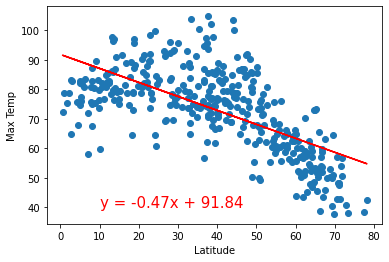

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

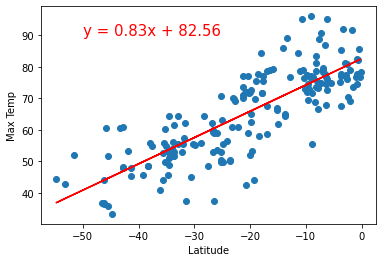

In [30]:
# Linear regression on the maximum temperature for the southern hemisphere 
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression for the Southern Hemisphere \
                       on the Max Temperature', 'Max Temp', (-50,90))

In [33]:
## Get the linear regression values for Southern hemi df
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress((southern_hemi_df["Lat"]),(southern_hemi_df["Max Temp"]))
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The slope is: {slope:.2f}")
print(f"The r_value is: {r_value:.3f}")
print(f"The intercept is: {intercept:.2f}")
print(f"The std_err is: {std_err:.2f}")

y = 0.83x + 82.56
The p-value is: 0.000
The slope is: 0.83
The r_value is: 0.811
The intercept is: 82.56
The std_err is: 0.04


In [34]:
## Get the linear regression values for northern hemi df
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress((northern_hemi_df["Lat"]),(northern_hemi_df["Max Temp"]))
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The slope is: {slope:.2f}")
print(f"The r_value is: {r_value:.3f}")
print(f"The intercept is: {intercept:.2f}")
print(f"The std_err is: {std_err:.2f}")

y = -0.47x + 91.84
The p-value is: 0.000
The slope is: -0.47
The r_value is: -0.652
The intercept is: 91.84
The std_err is: 0.03


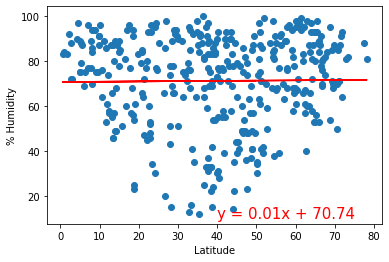

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

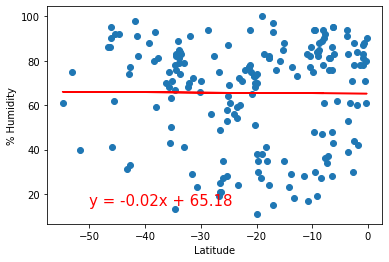

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


In [40]:
## Get the linear regression values for northern hemi df
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress((northern_hemi_df["Lat"]),(northern_hemi_df["Humidity"]))
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r_value is: {r_value:.3f}")


y = 0.01x + 70.74
The p-value is: 0.824
The r_value is: 0.011


In [42]:
## Get the linear regression values for northern hemi df
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress((southern_hemi_df["Lat"]),(southern_hemi_df["Humidity"]))
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r_value is: {r_value:.3f}")

y = -0.02x + 65.18
The p-value is: 0.905
The r_value is: -0.009


In [43]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-19 19:44:57,3.0707,172.7902,82.87,72,100,11.56
3,Clyde River,CA,2021-07-19 19:44:58,70.4692,-68.5914,43.03,70,90,9.22
4,Chokurdakh,RU,2021-07-19 19:44:58,70.6333,147.9167,56.93,50,100,7.27
6,Nanortalik,GL,2021-07-19 19:44:58,60.1432,-45.2371,43.92,98,100,8.68
8,Novikovo,RU,2021-07-19 19:44:58,51.1537,37.8879,73.78,71,8,4.14


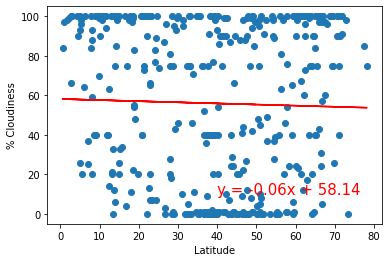

In [44]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

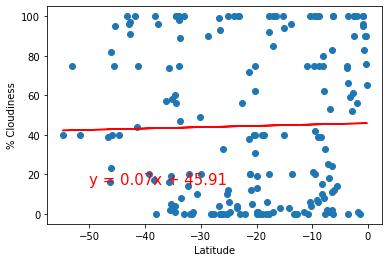

In [45]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

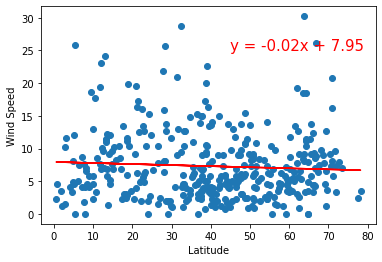

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,25))

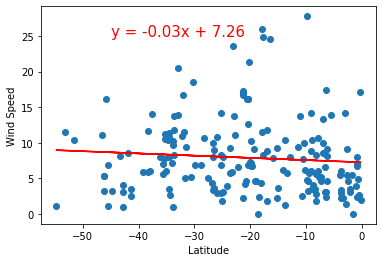

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-45,25))